## Problem 1

In [1]:
from __future__ import division
import numpy as np
from matplotlib import animation, rcParams, pyplot as plt
import scipy.linalg as la
rcParams['animation.html'] = 'html5'

#%matplotlib inline

v = .05
def f(x):
    arr = np.zeros((2, len(x)))
    arr[0,:] = .2-np.abs(x - .5)
    return 2*arr.max(axis=0)

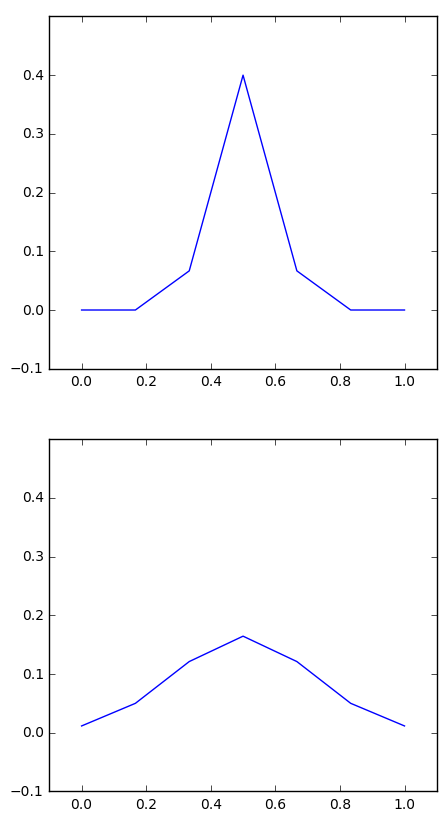

In [2]:
def prob1():
    k = 1/10
    h = 1/6

    x = np.linspace(0,1,7)
    t = np.linspace(0,1,11)

    lam = v*k/h**2
    A = np.diag([1-2*lam]*len(x)) + np.diag([lam]*(len(x)-1), -1) + np.diag([lam]*(len(x)-1), 1)

    A4 = A.dot(A).dot(A).dot(A)

    plt.subplot(2,1,1)
    plt.plot(x, f(x))
    plt.xlim(-.1,1.1)
    plt.ylim(-.1, .5)

    plt.subplot(2,1,2)
    plt.plot(x, A4.dot(f(x)))
    plt.xlim(-.1,1.1)
    plt.ylim(-.1, .5)
    plt.show()

rcParams["figure.figsize"] = (5,10)
prob1()

## Problem 2

In [3]:
x = np.linspace(-12,12,141)
t = np.linspace(0,1,71)

def f(x):
    arr = np.zeros((2, len(x)))
    arr[0,:] = 1-x**2
    return arr.max(axis=0)

def prob2(t_intervals):
    k = 1/t_intervals
    h = 24/140

    lam = k/h**2
    A = np.diag([1-2*lam]*len(x)) + np.diag([lam]*(len(x)-1), -1) + np.diag([lam]*(len(x)-1), 1)

    plt.plot(x,f(x))

    y = A.dot(f(x))
    y[0] = 0
    y[-1] = 0
    y_vals = [y]

    for i in xrange(t_intervals):
        y = A.dot(y)
        y[0] = 0
        y[-1] = 0
        y_vals.append(y)

    fig = plt.figure()
    plt.axes(xlim=(-12,12), ylim=(-.1, 1.1))

    line, = plt.plot([], [])

    def animate(i):
        line.set_data(x, y_vals[i])

    return animation.FuncAnimation(fig, animate, frames=len(y_vals), interval=20)

In [4]:
rcParams["figure.figsize"] = (6,4)
prob2(70)

In [5]:
prob2(66)

## Problem 3

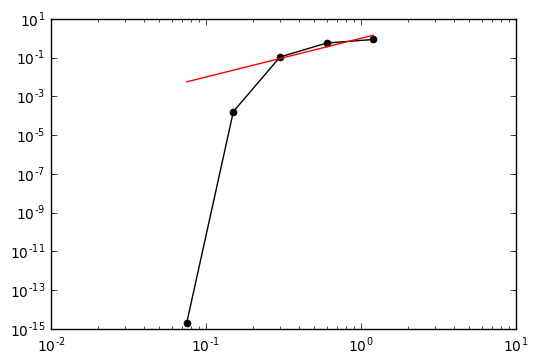

In [20]:
def prob3():
    
    def f(x):
        arr = np.zeros((2, len(x)))
        arr[0,:] = 1-x**2
        return arr.max(axis=0)

    approx = []
    for intervals in [20,40,80,160,320,640]:
        k = 1/intervals
        h = 24/intervals
        
        x = np.linspace(-12,12,intervals+1)
        
        lam = v*k/h**2
        A = np.diag([1-2*lam]*len(x)) + np.diag([lam]*(len(x)-1), -1) + np.diag([lam]*(len(x)-1), 1)
        B = np.diag([1+2*lam]*len(x)) + np.diag([-lam]*(len(x)-1), -1) + np.diag([-lam]*(len(x)-1), 1)

        y = la.solve(B, A.dot(f(x)))
        y[0] = 0
        y[-1] = 0

        for i in xrange(intervals):
            y = la.solve(B, A.dot(y))
            y[0] = 0
            y[-1] = 0
        
        approx.append(y)
    
    return approx
    
errors = []
solution = approx[-1][::32]
for i, a in enumerate(approx[:-1]):
    errors.append(np.max(np.abs(a[::2**(i)] - solution)))

h_vals = [24/i for i in [20,40,80,160,320]]
plt.loglog(h_vals, errors, color='k', marker='.', ms=10 )
plt.loglog(h_vals, np.array(h_vals)**2, 'r')
plt.show()

In [21]:
print np.linspace(0,1,21)
print np.linspace(0,1,41)[::2]
print np.linspace(0,1,81)[::4]

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]
